# Моделирование квантовой системы в потенциале прямоугольной формы

## Теоретическая часть

### 1. Физическая постановка задачи

Рассматривается движение квантовой частицы в одномерной прямоугольной потенциальной яме:

$$
V(x) = 
\begin{cases} 
-U, & |x| < a \\
0, & |x| \geq a 
\end{cases}
$$

где:
- $a$ — полуширина ямы
- $U$ — глубина потенциальной ямы

---

### 2. Уравнение Шрёдингера

Стационарное уравнение Шрёдингера имеет вид:

$$
-\frac{\hbar^2}{2m} \frac{d^2\psi}{dx^2} + V(x)\psi(x) = E\psi(x)
$$

где:
- $\hbar$ — редуцированная постоянная Планка
- $m$ — масса частицы
- $E$ — полная энергия частицы
- $\psi(x)$ — волновая функция

---

### 3. Численный метод решения

#### Дискретизация пространства
- Разбиваем область $[-L, L]$ на $N$ точек
- Шаг сетки: $\Delta x = \frac{2L}{N-1}$

#### Аппроксимация производной
Вторая производная аппроксимируется конечными разностями:

$$
\frac{d^2\psi}{dx^2} \approx \frac{\psi_{i+1} - 2\psi_i + \psi_{i-1}}{\Delta x^2}
$$

#### Построение матрицы Гамильтона
Матрица Гамильтона имеет трехдиагональный вид:

- Главная диагональ:
  $$
  H_{ii} = \frac{\hbar^2}{m\Delta x^2} + V(x_i)
  $$
- Внедиагональные элементы:
  $$
  H_{i,i+1} = H_{i,i-1} = -\frac{\hbar^2}{2m\Delta x^2}
  $$

#### Решение задачи на собственные значения
Решаем уравнение:

$$
H\psi = E\psi
$$

где:
- $E$ — собственные значения (энергии)
- $\psi$ — собственные векторы (волновые функции)

---

### 4. Нормировка волновых функций

Волновые функции нормируются условием:

$$
\int_{-\infty}^{+\infty} |\psi(x)|^2 dx = 1
$$

В дискретном виде:

$$
\sum_{i=1}^{N} |\psi_i|^2 \Delta x = 1
$$

---

### 5. Связанные состояния

Связанные состояния существуют при $E < 0$

Волновое число внутри ямы:

$$
k = \sqrt{\frac{2m(E + U)}{\hbar^2}}
$$

---

In [11]:
import numpy as np
import matplotlib.pyplot as plt

Определение параметров системы

In [12]:
# Физические константы
hbar = 1.0545718e-34        # ℏ редуцированная постоянная Планка (Планка-Дирака), [Дж·с]
m = 9.1093837e-31           # масса электрона, [кг]

In [13]:
# Параметры потенциальной ямы
a = 1.0e-10                     # половина ширины ямы, [м]
U_eV = 50.0                    # U — величина потенциала/глубина потенциальной ямы, [эВ]
U_J = U_eV * 1.6021766e-19    # Перевод U_eV из эВ в джоули: [Дж]

In [14]:
# Параметры расчетной сетки
L = 5 * a                   # граница области моделирования, [м]
N = 1000                    # количество точек сетки
x = np.linspace(-L, L, N)   # пространственная сетка, [м]
dx = x[1] - x[0]            # шаг сетки, [м]

Построение потенциала

In [15]:
# # Потенциал V(x) прямоугольной ямы
V = np.zeros(N)                 # V(x) — потенциальная энергия, [Дж]
inside_well = np.abs(x) < a     # определение ямы
V[inside_well] = -U_J           # V(x) = -U внутри ямы, V(x) = 0 вне ямы

Построение матрицы Гамильтона

Вычисление коэффициента $k_e=-\frac{\hbar^2}{2mdx^2}$, который соответствует члену кинетической энергии при аппроксимации второй производной

Основная диагональ $H_{ii}$=$-2k_e+V(x_i)$

Остальные элементы $H_{i, i+-1}=k_e$

In [16]:
k_coeff = -hbar**2 / (2 * m * dx**2)        # коэффициент перед второй производной для кинетической энергии [Дж]
main_diag = np.full(N, -2 * k_coeff) + V    # главная диагональ: кинетическая + потенциальная энергия
off_diag = np.full(N-1, k_coeff)            # остальные элементы: кинетическая энергия

# Построение матрицы
H = np.diag(main_diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1)

Нахождение собственных значений и векторов и вывод связанных состояний

In [17]:
# Решение задачи собственного значения: H ψ = E ψ
eigenvalues, eigenvectors = np.linalg.eigh(H)

# Перевод энергий в эВ
energies_eV = eigenvalues / 1.60218e-19

# Выделение связанных состояний (E < 0)
bound_mask = energies_eV < 0
bound_energies = energies_eV[bound_mask]
bound_states = eigenvectors[:, bound_mask]

# Вывод
print("Энергии связанных состояний (в эВ):")
for n in range(len(bound_energies)):
    print(f"Энергия E_{n+1} = {bound_energies[n]:.4f} эВ")

Энергии связанных состояний (в эВ):
Энергия E_1 = -44.2857 эВ
Энергия E_2 = -27.8552 эВ
Энергия E_3 = -4.6799 эВ


Нормировка волновых функций

In [18]:
for i in range(bound_states.shape[1]):
    psi = bound_states[:, i]
    # Используем np.trapezoid для численного интегрирования
    norm_const = np.sqrt(np.trapezoid(np.abs(psi)**2, x))
    bound_states[:, i] = psi / norm_const

Визуализация результатов

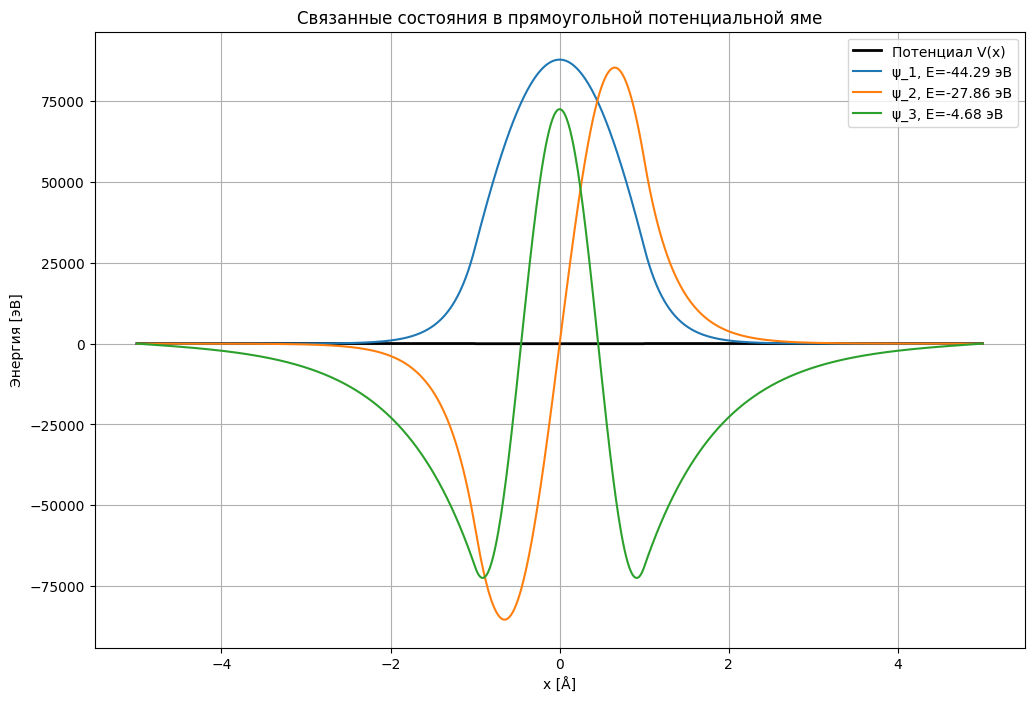

In [19]:
plt.figure(figsize=(12, 8))

# Построение потенциала
plt.plot(x * 1e10, V / 1.60218e-19, 'k-', linewidth=2, label='Потенциал V(x)')

# Построение волновых функций
for i in range(len(bound_energies)):
    psi = bound_states[:, i]
    plt.plot(x * 1e10, psi + bound_energies[i], 
             label=f'ψ_{i+1}, E={bound_energies[i]:.2f} эВ')

plt.xlabel('x [Å]')
plt.ylabel('Энергия [эВ]')
plt.legend()
plt.grid(True)
plt.title('Связанные состояния в прямоугольной потенциальной яме')
plt.show()

Вычисление волновых чисел для связанных состояний $k=\sqrt{\frac{2m(E+U_0)}{\hbar^2}}$

In [20]:
# Проверка, что E + U > 0 для корня
valid_indices = bound_energies + U_eV > 0

k_values = np.sqrt(2 * m * (bound_energies[valid_indices] * 1.60218e-19 + U_J)) / hbar  # [1/м]
k_values_nm = k_values * 1e-9  # перевод в [1/нм]

print("\nВолновые числа связанных состояний:")
for i, k in enumerate(k_values_nm):
    print(f"k_{i+1} = {k:.4f} 1/нм")



Волновые числа связанных состояний:
k_1 = 12.2466 1/нм
k_2 = 24.1087 1/нм
k_3 = 34.4893 1/нм
